# CE101 work by Lewis Johnson




### Notes:

Add more comments

Mess with data of featureList in [3]


## Importing libraries etc:

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

houseData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

## Raw Data:
I have inserted a reference so that I can look at the data. This also tests that I have the right file path

In [24]:
houseData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Unnamed: 81
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,0.0
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,NaN
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,NaN
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,NaN
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,NaN
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,NaN
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,NaN
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,NaN


In [25]:
testData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Checking no. of nulls in each column
Included a representation of the columns to check which columns contained how many null values.

In [26]:
empty_columns_house = houseData.columns[houseData.isnull().any()]
houseData[empty_columns_house].isnull().sum().sort_values(ascending = False)

Unnamed: 81     1460
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### Removing empty columns
This will ensure the algorithmn does not make any assumptions based on these variables and give unexpected results.

In [27]:
houseData.drop(empty_columns_house, axis = 1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


# Correlation between variables

I imported seaborn as sns to view which variables have a good correlation with the sales price.

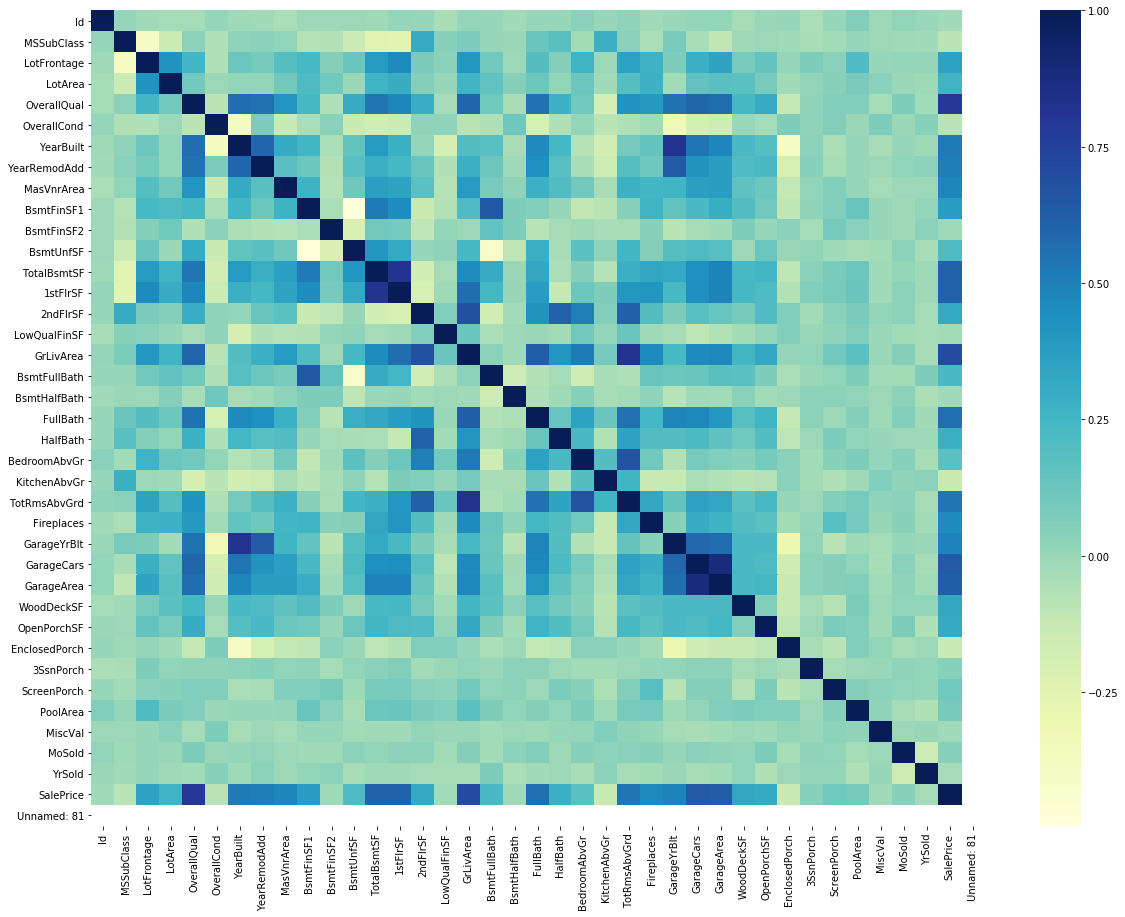

In [28]:
plt.subplots(figsize = (20,15))
corMatrix = houseData.corr()
sns.heatmap(corMatrix, xticklabels = corMatrix.columns.values, yticklabels = corMatrix.columns.values, cmap="YlGnBu")

# Selecting optimal variables for the model
I will use the above correlation matrix to choose the most relevant features for my training model.

In [29]:
featureListProspective = corMatrix["SalePrice"][0.5 < abs(corMatrix["SalePrice"])]
featureListProspective = featureListProspective[featureListProspective != 1]
featureListProspective

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

# Training Model
I have taken the set of predictive features that have the highest correlation to the sale price and used them for my training model

In [30]:
#The prospective features have been appended to the list below
featureList = featureListProspective.index.tolist()
featureData = houseData[featureList]

In [31]:
#These features are then used for a training model
trainingModel = DecisionTreeRegressor(random_state=1)
trainingModel.fit(featureData, houseData.SalePrice)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [32]:
#Predictions made
predictions = trainingModel.predict(featureData)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [33]:
print("First predictions:", trainingModel.predict(featureData.head()))
print("Target values:", houseData.SalePrice.head().tolist())

First predictions: [208500. 181500. 223500. 140000. 250000.]
Target values: [208500, 181500, 223500, 140000, 250000]


## Model Validation

In [34]:
#Splits arrays or matrices into random train and test subsets
trainData, valData, trainTarget, valTarget = train_test_split(featureData, houseData.SalePrice, random_state = 1)

#Pushes the training data into a DTR model
trainingModel = DecisionTreeRegressor(random_state = 1)
trainingModel.fit(trainData, trainTarget)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [35]:
#Validation predictions made and MAE calculated
valPredictions = trainingModel.predict(valData)
valMAE = mean_absolute_error(valTarget, valPredictions)
print(valMAE)

25985.87671232877


## Mean Absolute Error function

In [36]:
# Function for getting the mean absolute error
def getMAE(max_leaf_nodes, trainData, valData, trainTarget, valTarget):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(trainData, trainTarget)
    predsVal = model.predict(valData)
    MAE = mean_absolute_error(valTarget, predsVal)
    return(MAE)

## Decision Tree Regressor model

In [37]:
# evaluates the best number of leaf nodes to use in our tree:
candidateMaxLeafNodes = [5, 25, 50, 100, 250, 500]
leafNodeValues = []
for x in candidateMaxLeafNodes:
    leafNodeValues.append(getMAE(x, trainData, valData, trainTarget, valTarget))
bestTreeSize = candidateMaxLeafNodes[leafNodeValues.index(min(leafNodeValues))]

In [38]:
#Final model created using the tree size decided previously
finalModel = DecisionTreeRegressor(max_leaf_nodes=bestTreeSize, random_state=1)
finalModel.fit(featureData, houseData.SalePrice)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=50, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

## Random Forest Regressor model

In [39]:
#Creates a random forest model using the training data
RFModel = RandomForestRegressor(random_state=1)
RFModel.fit(trainData, trainTarget)

#Makes a prediction using the model
RFValPredictions = RFModel.predict(valData)

#Generates and outputs the mean absolute error and score for the model
RFvalMAE = mean_absolute_error(RFValPredictions, valTarget)
print("Mean absolute error:")
print(RFvalMAE)
print("Score:")
print(RFModel.score(featureData, houseData.SalePrice))

Mean absolute error:
20719.621917808217
Score:
0.9385304161693303


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
#Filling the null values with 0
testData = testData.fillna(0)

#Converting column values to integers
testData['TotalBsmtSF'] = testData.TotalBsmtSF.astype(int)
testData['GarageCars'] = testData.GarageCars.astype(int)
testData['GarageArea'] = testData.GarageArea.astype(int)

#Testing no. of row x columns
testData.describe()
testData.shape

(1459, 80)

# Final Random Forest Model

In [41]:
# New RF model for test data using chosen features
RFFinished = RandomForestRegressor(random_state=1)
RFFinished.fit(featureData, houseData.SalePrice)

testFeatures = testData[featureList]
testFeatures.dtypes

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


OverallQual     int64
YearBuilt       int64
YearRemodAdd    int64
TotalBsmtSF     int64
1stFlrSF        int64
GrLivArea       int64
FullBath        int64
TotRmsAbvGrd    int64
GarageCars      int64
GarageArea      int64
dtype: object

# New RF model for test data using chosen features
#RFFinished = RandomForestRegressor(random_state=1)
#RFFinished.fit(featureData, houseData.SalePrice)

#Droping all null values in dataframe to enable changing datatype to int
#testData = testData.dropna()
#testData['YearBuilt'] = testData.YearBuilt.astype(int)
#testData['YearRemodAdd'] = testData.YearRemodAdd.astype(int)
#testData['1stFlrSF'] = testData.1stFlrSF.astype(int)
#testData['GrLivArea'] = testData.GrLivArea.astype(int)
#testData['OverallQual'] = testData.OverallQual.astype(int)
#testData['TotalBsmtSF'] = testData.TotalBsmtSF.astype(int)
#testData['GarageCars'] = testData.GarageCars.astype(int)
#testData['GarageArea'] = testData.GarageArea.astype(int)
#testData['FullBath'] = testData.FullBath.astype(int)
#testData['TotRmsAbvGrd'] = testData.TotRmsAbvGrd.astype(int)
#testFeatures = testData[featureList]
#testFeatures.dtypes

In [42]:
testPredictions =  RFFinished.predict(testFeatures)

In [43]:
#Outputs data to csv file
outputDataFrame = pd.DataFrame()
outputDataFrame["id"] = testData.Id
outputDataFrame["salePrice"] = testPredictions
outputDataFrame.to_csv("OutputCSV.csv", index=False)